In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
!nvidia-smi

Mon Aug 16 16:12:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    28W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [256, 128]

#for nahids drive
train_path = '/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Train'
valid_path = '/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Test'

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Train/*')

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 63, 32)  864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 63, 32)  96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 63, 32)  0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Train',
                                                 target_size = (256, 128),
                                                 batch_size = 5,
                                                 class_mode = 'categorical')


Found 270 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Test',
                                            target_size = (256, 128),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 90 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Model/model_inception_256x128_1.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
54/54 [==============================] - 126s 2s/step - loss: 3.0107 - accuracy: 0.6593 - val_loss: 2.0116 - val_accuracy: 0.7111
Epoch 2/10
54/54 [==============================] - 4s 78ms/step - loss: 3.5873 - accuracy: 0.6778 - val_loss: 4.3307 - val_accuracy: 0.6222
Epoch 3/10
54/54 [==============================] - 4s 78ms/step - loss: 2.4451 - accuracy: 0.7778 - val_loss: 3.9318 - val_accuracy: 0.6444
Epoch 4/10
54/54 [==============================] - 4s 76ms/step - loss: 1.4692 - accuracy: 0.8037 - val_loss: 2.4877 - val_accuracy: 0.6000
Epoch 5/10
54/54 [==============================] - 4s 76ms/step - loss: 1.1404 - accuracy: 0.8481 - val_loss: 2.3282 - val_accuracy: 0.6000
Epoch 6/10
54/54 [==============================] - 4s 77ms/step - loss: 0.8266 - accuracy: 0.8630 - val_loss: 3.3205 - val_accuracy: 0.6222
Epoch 7/10
54/54 [==============================] - 4s 75ms/step - loss: 1.1589 - accuracy: 0.8037 - val_loss: 3.4260 - val_accuracy: 0.5333
Epoch 8/10
54

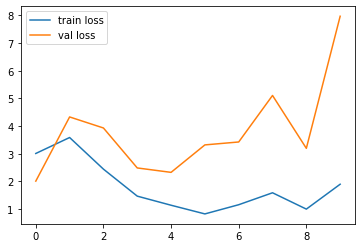

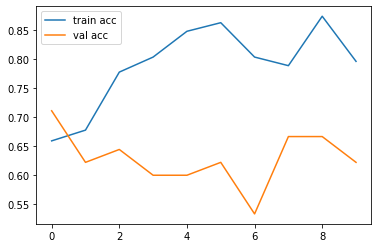

<Figure size 432x288 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')